<table align="center" width=60%>
    <tr>
        <td>
            <div align="center">
                <font color="#7F0542 ">
                    <b><h1>Graduate Admissions</h1>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement:

The conducted analysis aids in comprehending the significance of various factors in the admission process of graduate programs and their interdependency. <br>
Additionally, it enables the prediction of an individual's probability of admission based on the other variables present.

## Data Description:

The dataset contains several parameters which are considered important during the application for Masters Programs.

The parameters included are :

* GRE Scores ( out of 340 )
* TOEFL Scores ( out of 120 )
* University Rating ( out of 5 )
* Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
* Undergraduate GPA ( out of 10 )
* Research Experience ( either 0 or 1 )
* Chance of Admit ( ranging from 0 to 1 )

## Concepts Used:

* Exploratory Data Analysis
* Linear Regression

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Load & Analyze Data](#Read_Data)**
    - 3.1 -[Descriptive Statistics](#Descriptive_stats)
    - 3.2 -[Missing Values](#Missing_Values)
    - 3.3 -[Duplicate Values Check](#Duplicate_Values)
    - 3.4 -[Inferences](#Inferences_1)
4. **[Exploratory Data Analysis](#data_preparation)**
    - 4.1 - [Univariate Analysis](#Univariate)
    - 4.2 - [Bi-Variate Analysis](#Bivariate)
    - 4.3 - [Heatmap](#Heatmap)
    - 4.4 - [Inferences](#IF)
5. **[Modeling](#Model)**
    - 5.1 - [Train test Split](#TTS)
    - 5.2 - [Feature Scaling](#Scaling)
    - 5.3 - [Model training](#Model_training)
      - 5.3.1 - [Baseline Model](#baseline)
      - 5.3.2 - [Lasso](#lasso)
      - 5.3.3 - [Ridge](#ridge)
    - 5.4 - [Check VIF Score](#VIF)
    - 5.5 - [Model Summary](#model_summary )
    - 5.6 - [Model Tuning](#Model_Tuning )
    - 5.7 - [Feature Importance](#Feature_Importance)
6. **[Assumptions Validation](#Assumptions)**
    - 6.1 -[Linearity](#Linearity)
    - 6.2 -[Features are not multi-collinear](#Multicollinear)
    - 6.3 -[Errors are normally distributed](#error_dist)
    - 6.4 -[Heteroskedasticity](#Heteroskedasticity)
    - 6.5 -[Mean of Residuals](#Residuals)
7. **[Model Performance Evaluation](#Model_performance)**
8. **[Insights](#Insights)**
9. **[Recommendations](#Recommendations)**

# 1. Import Libraries <a id='import_lib'></a>

In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_white

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score


import warnings
warnings.filterwarnings("ignore")

# 2. Set Options <a id='set_options'></a>

In [2]:
warnings.simplefilter('ignore')
pd.set_option("display.max_columns", None)
pd.options.display.float_format = '{:.2f}'.format
sns.set_style('white')

# 3. Load & Analyze Data<a id='Read_Data'></a>

In [3]:
## Reading Dataframe
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.50,4.50,9.65,1,0.92
1,2,324,107,4,4.00,4.50,8.87,1,0.76
2,3,316,104,3,3.00,3.50,8.00,1,0.72
3,4,322,110,3,3.50,2.50,8.67,1,0.80
4,5,314,103,2,2.00,3.00,8.21,0,0.65


**Shape of data**

In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In this dataset we all **8 numerical columns**

### 3.1 Descriptive Statistics  <a id='Descriptive_stats'></a>

In [6]:
# Checking Descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.00,250.50,144.48,1.00,125.75,250.50,375.25,500.00
GRE Score,500.00,316.47,11.30,290.00,308.00,317.00,325.00,340.00
TOEFL Score,500.00,107.19,6.08,92.00,103.00,107.00,112.00,120.00
University Rating,500.00,3.11,1.14,1.00,2.00,3.00,4.00,5.00
SOP,500.00,3.37,0.99,1.00,2.50,3.50,4.00,5.00
LOR,500.00,3.48,0.93,1.00,3.00,3.50,4.00,5.00
CGPA,500.00,8.58,0.60,6.80,8.13,8.56,9.04,9.92
Research,500.00,0.56,0.50,0.00,0.00,1.00,1.00,1.00
Chance of Admit,500.00,0.72,0.14,0.34,0.63,0.72,0.82,0.97


In [7]:
# Drop column 'Serial No.'
df.drop(columns=['Serial No.'], axis=1, inplace=True)

### 3.2 Missing Values <a id='Missing_Values'></a>

In [8]:
missing_value = pd.DataFrame({
    'Missing Value': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df))*100
})

missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
GRE Score,0,0.00
TOEFL Score,0,0.00
University Rating,0,0.00
SOP,0,0.00
LOR,0,0.00
CGPA,0,0.00
Research,0,0.00
Chance of Admit,0,0.00


We have **no missing values** in the dataset

### 3.3 Duplicate Values Check <a id='Duplicate_Values'></a>

In [9]:
df.duplicated().sum()

0

We have **no duplicate values** in the dataset

In [10]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

**Clean the column names**

In [11]:
#There seems to be whitepaces in the column names, lets remove those
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

### 3.4 Inferences<a id='Inferences_1'></a>

1. Serial No. is dropped, not useful for our analysis.
2. No missing and duplicates records in the dataset.
3. All the features are numerical.
4. No outliers detected, mean-median had no significant difference.
5. Range of GRE score is 290-340, TOEFL score 92-120, and CGPA from 6.8-9.92. 
6. SOP and LOR scores are from 1 to 5.

## 4. Exploratory Data Analysis <a id='EDA'></a>

### 4.1 Univariate Analysis <a id='Univariate'></a>

In [12]:
# Helper function to plot

def numerical_plot(col_name):
    plt.subplots(figsize=(15, 5))
    plt.subplot(121)
    sns.distplot(df[col_name], color='black')
    plt.title(f"Distribution of {col_name}")
    plt.subplot(122)
    ax = sns.boxplot(y=df[col_name], showfliers=False)
    ax.axhline(df[col_name].median(), color='r', linestyle='--')
    plt.title(f"Boxplot of {col_name}")
    plt.tight_layout(pad=3)

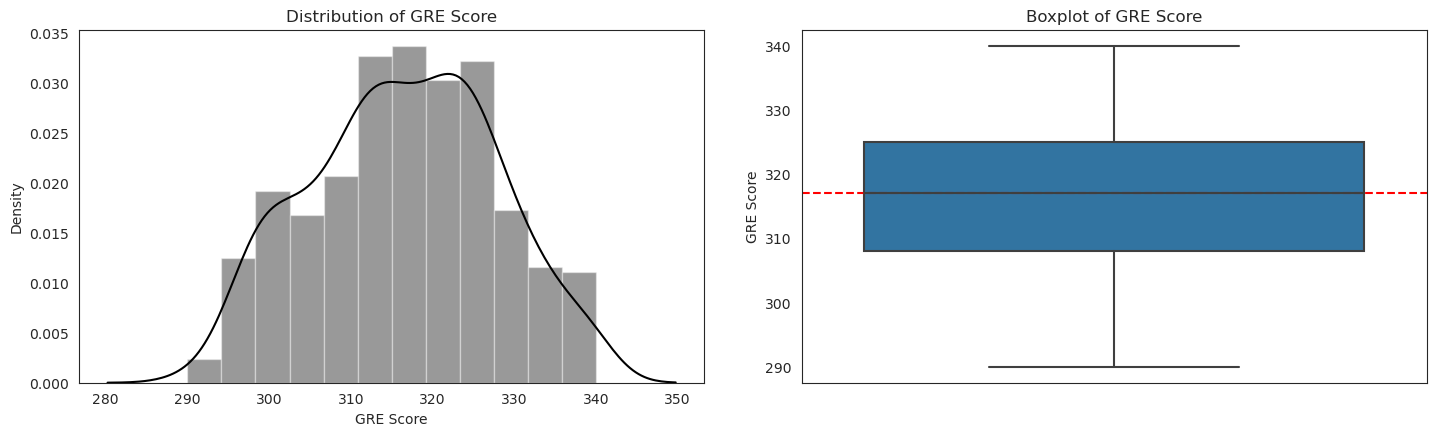

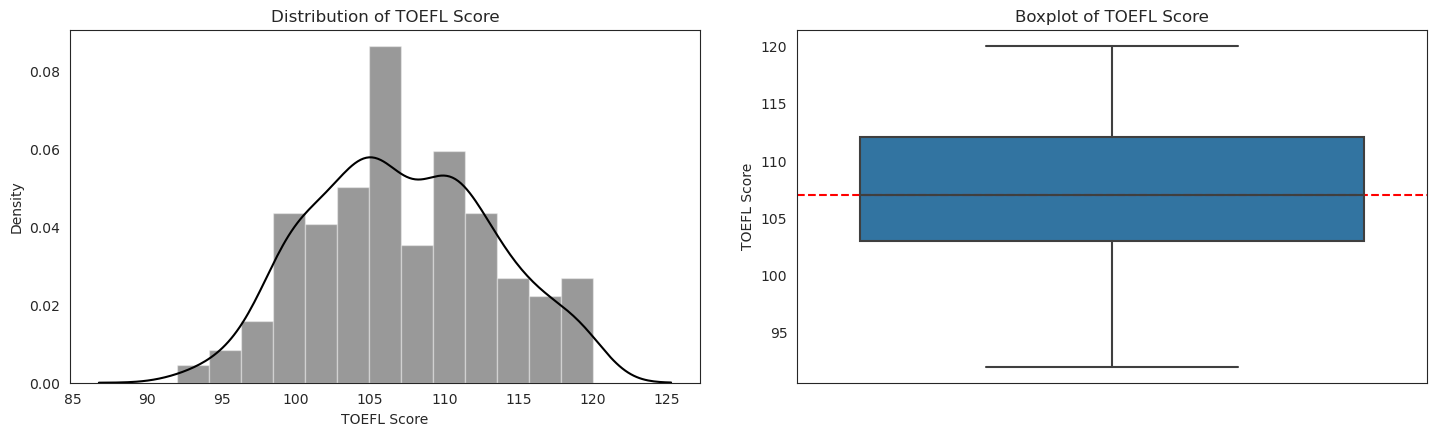

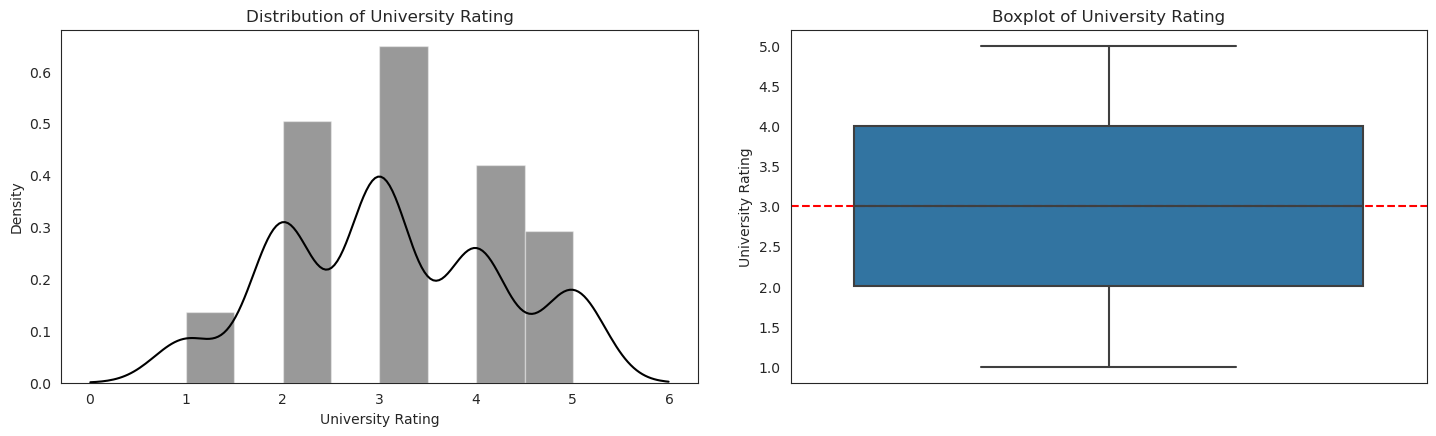

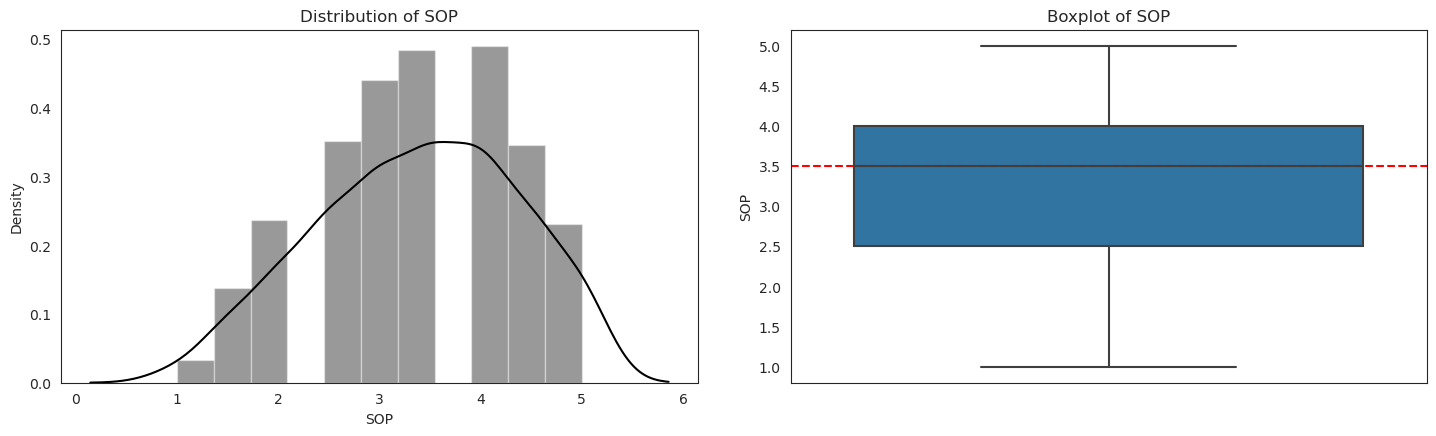

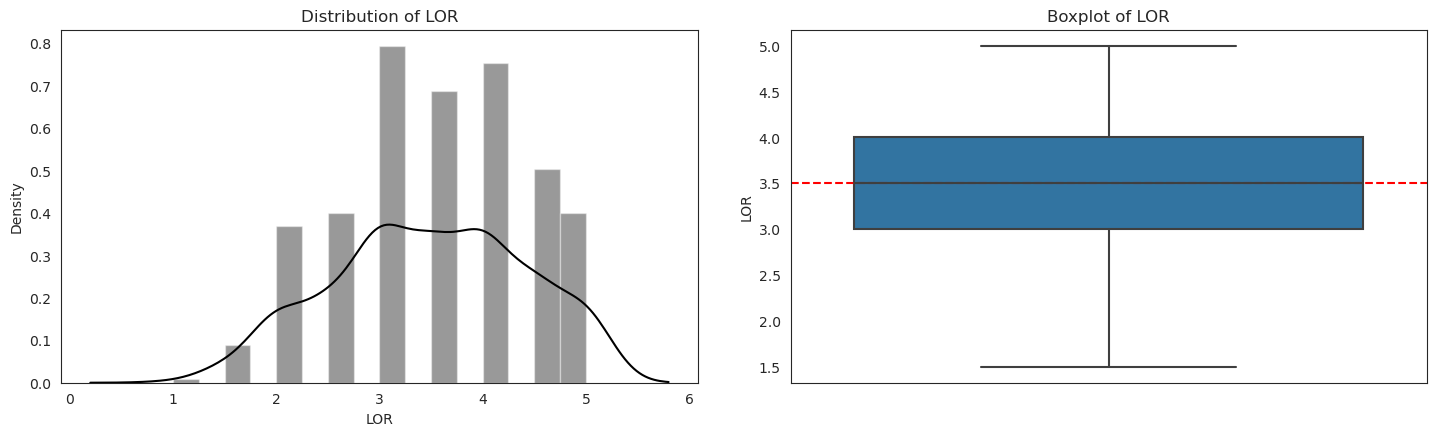

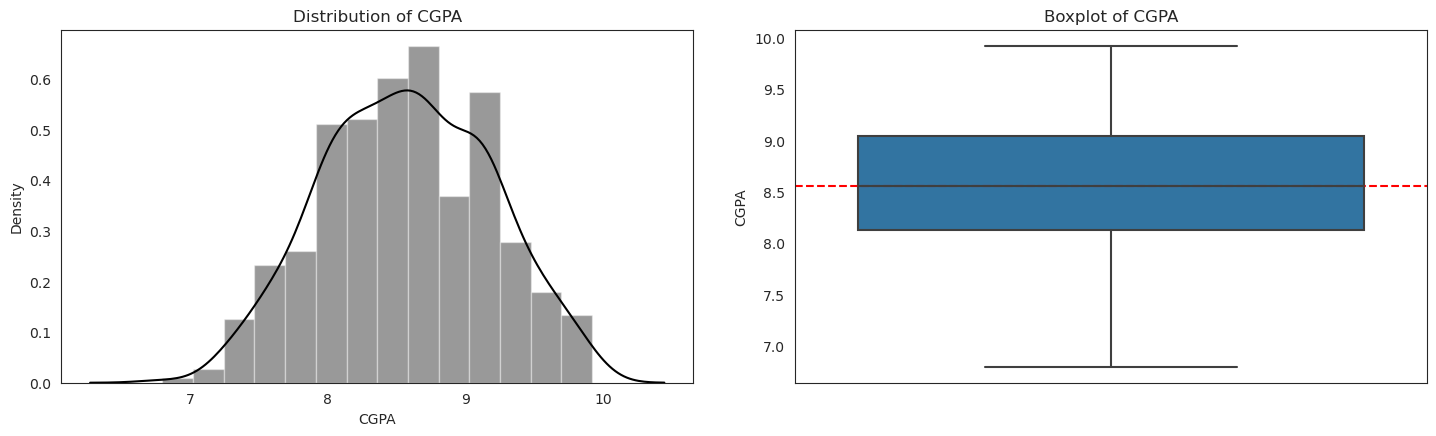

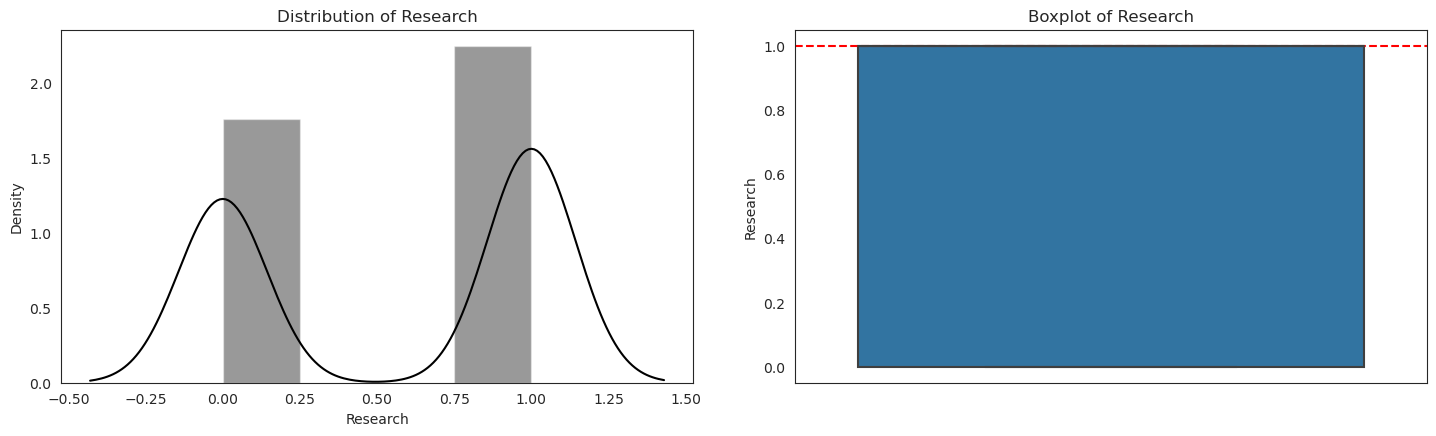

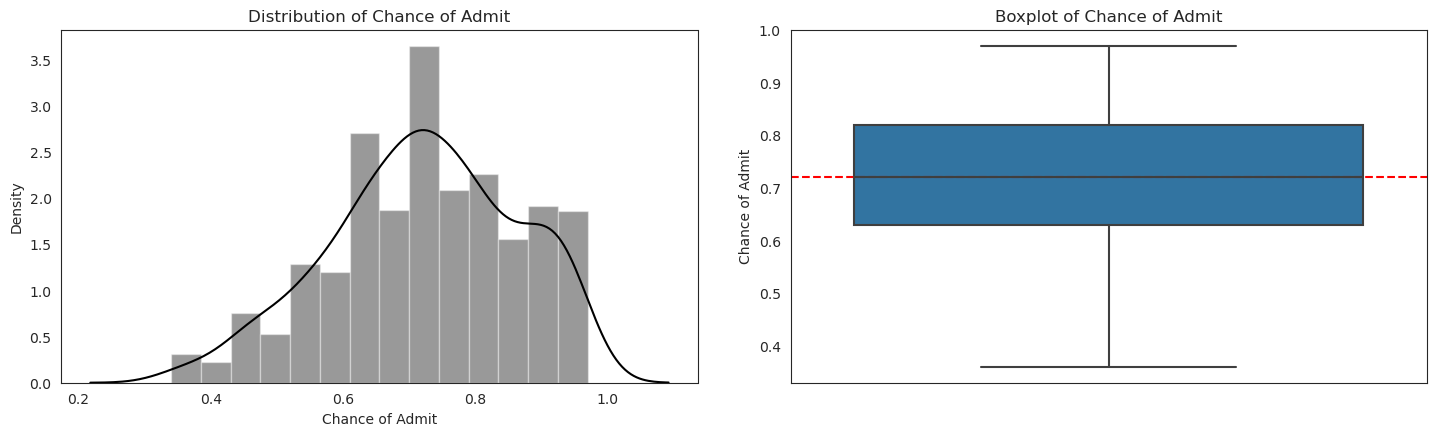

In [13]:
## Plot distributions of 

for i in df.columns:
    numerical_plot(i)

### 4.2 Bi-Variate Analysis <a id='Bivariate'></a>

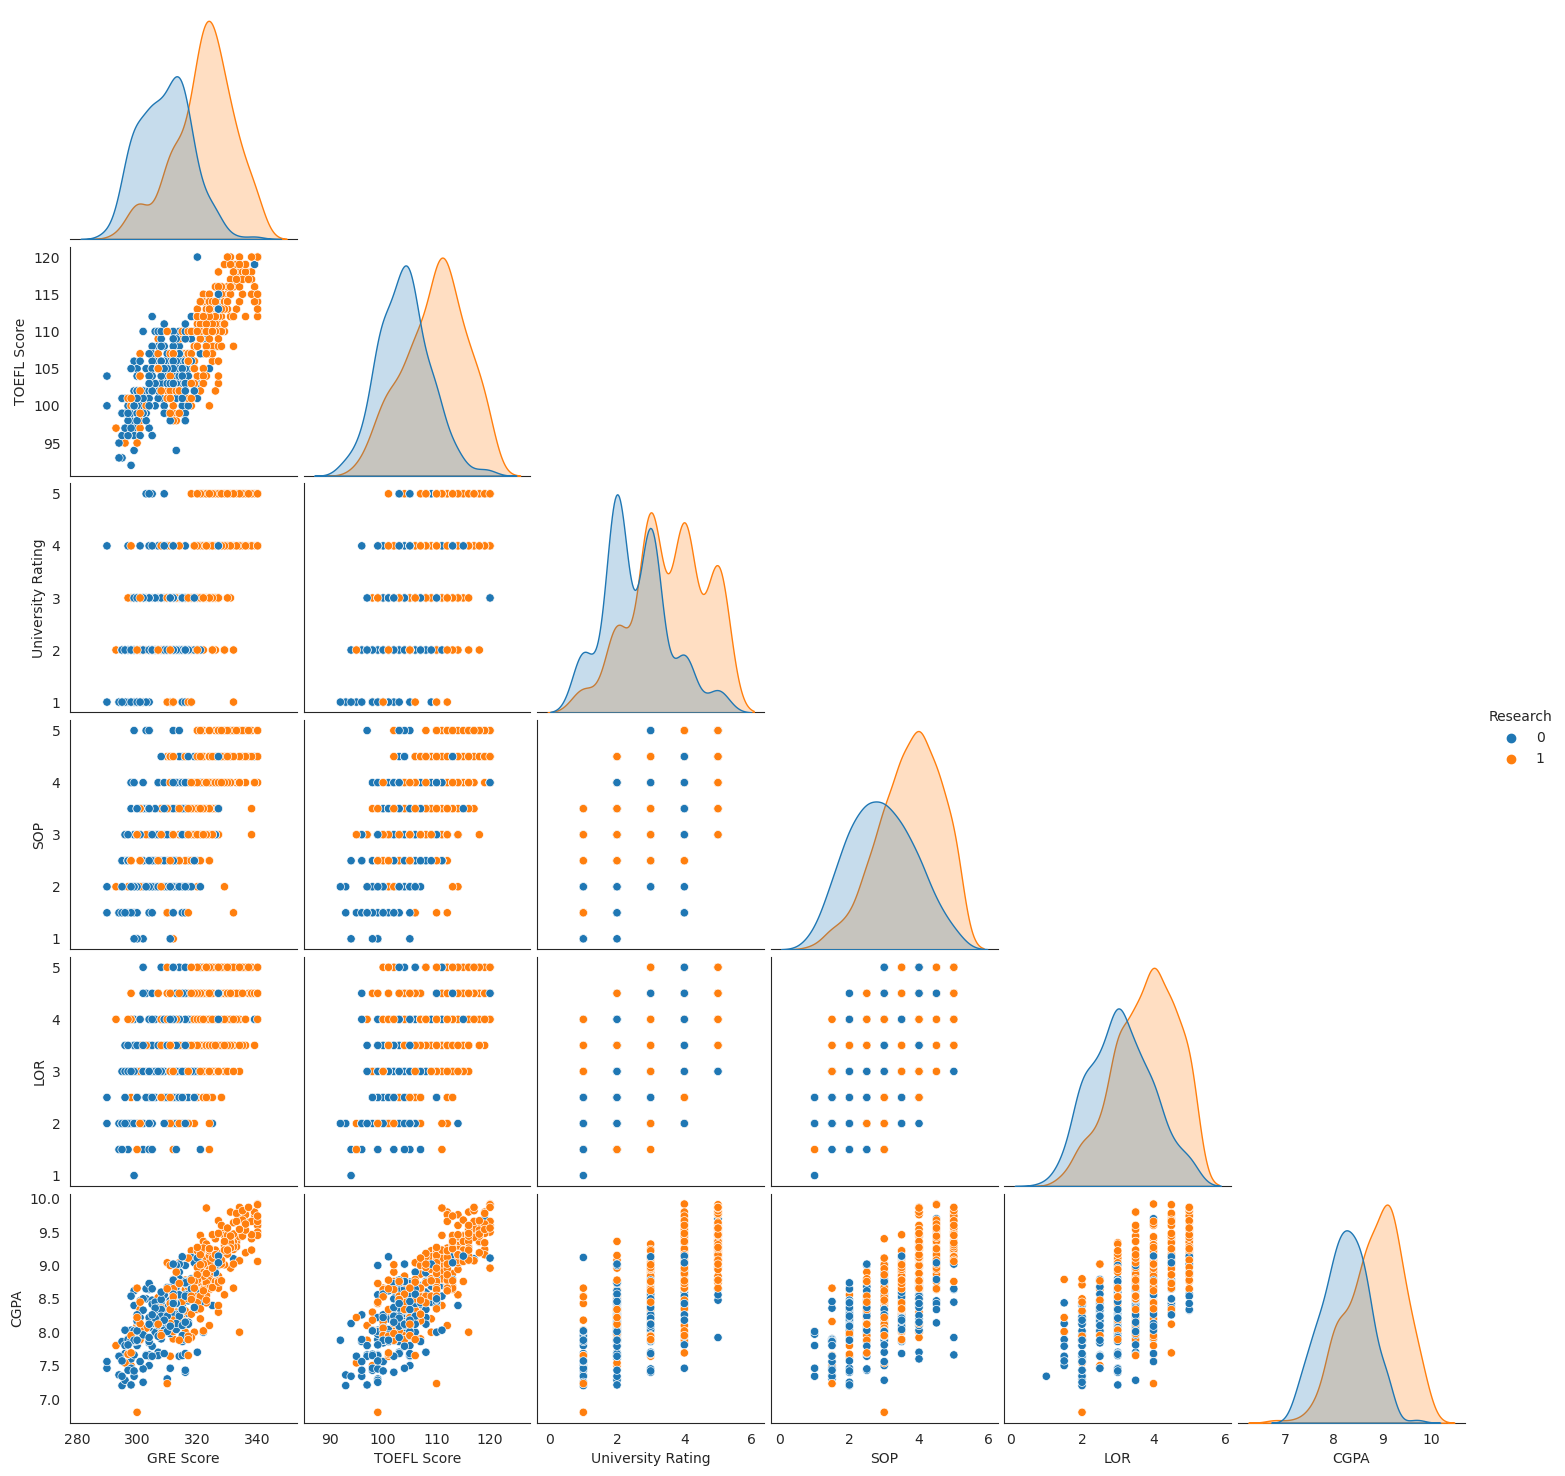

In [14]:
# Create pairplot
sns.pairplot(df, vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'], hue='Research', corner=True)

# Show plot
plt.show()

In [15]:
def scatter_plot(df, x_col, y_col, title):
    sns.scatterplot(x=x_col, y=y_col, data=df)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(alpha=0.3)
    plt.show()

def box_plot(df, x_col, y_col, title):
    sns.boxplot(x=x_col, y=y_col, data=df, showmeans=True)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(alpha=0.3)
    plt.show()

def plot_admissions_data(df, columns):
    for col in columns:
        if col in ['GRE Score', 'TOEFL Score','CGPA']:
            scatter_plot(df, col, 'Chance of Admit', f'Admission Rates by {col}')
        elif col == 'University Rating':
            box_plot(df, col, 'Chance of Admit', f'Admission Rates by {col}')
            plt.plot(df.groupby(col)['Chance of Admit'].mean(), marker='o', linestyle='--')
            plt.title(f'Mean Admission Rates by {col}')
            plt.xlabel(col)
            plt.ylabel('Chance of Admit')
            plt.grid(alpha=0.3)
            plt.show()
        elif col in ['SOP', 'LOR', 'Research']:
            box_plot(df, col, 'Chance of Admit', f'Admission Rates by {col}')

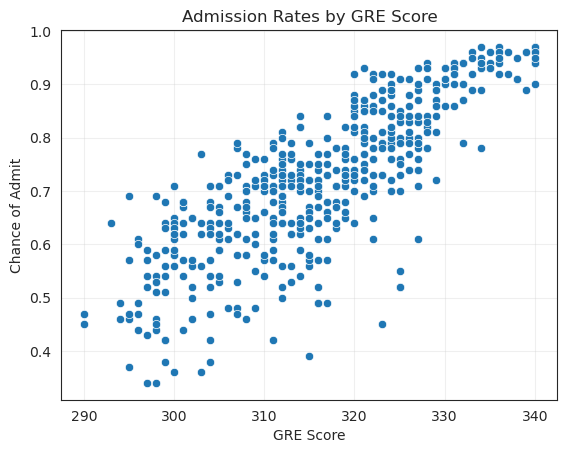

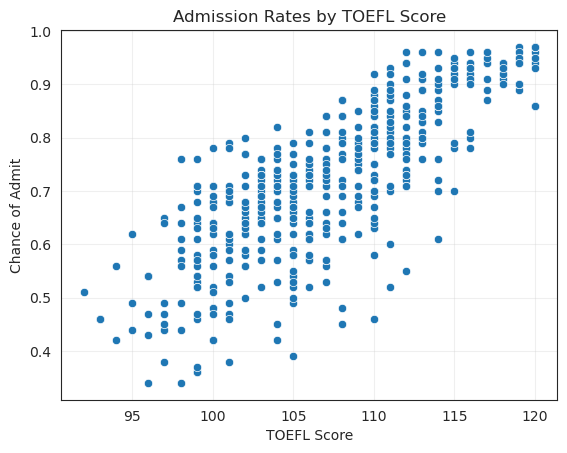

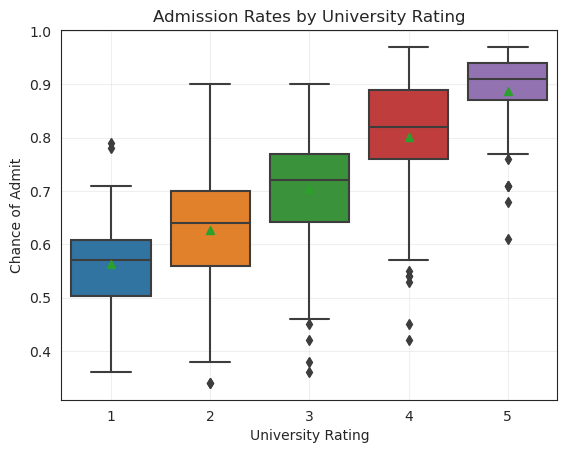

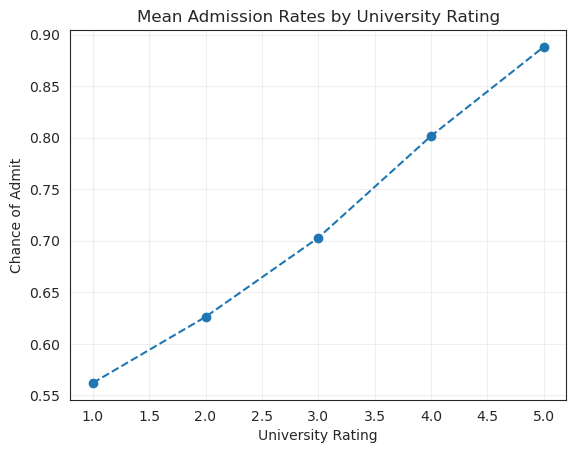

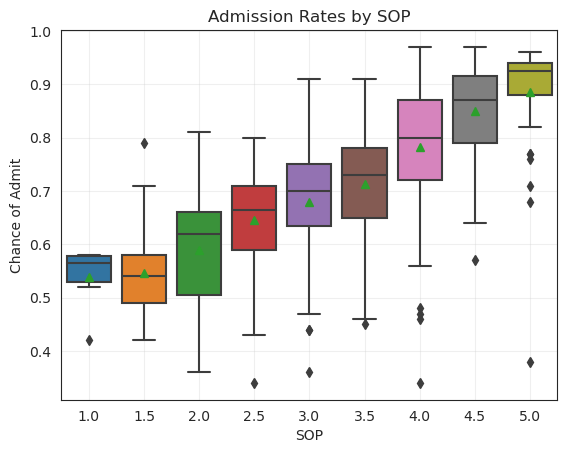

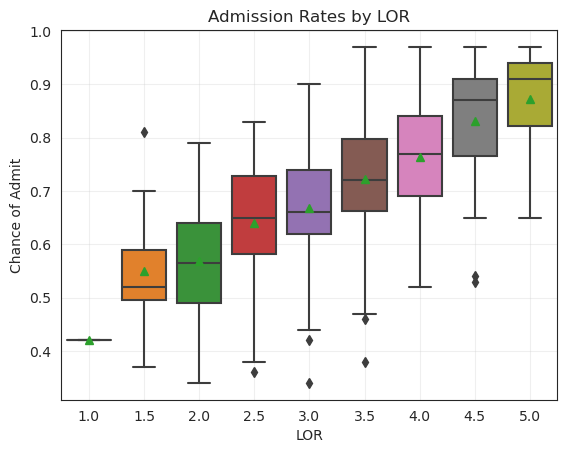

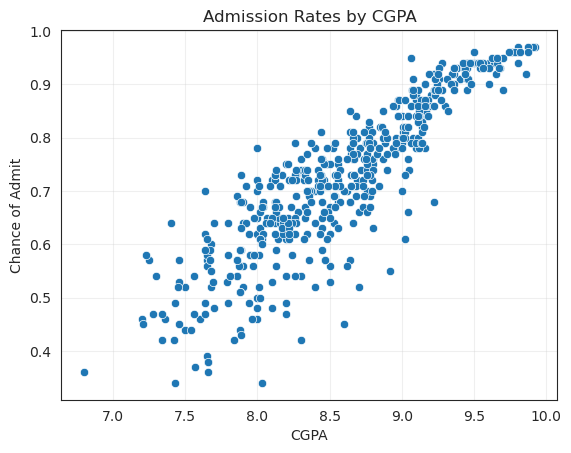

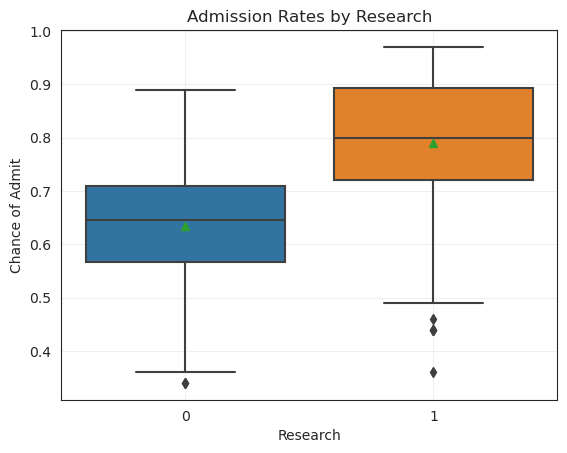

In [16]:
plot_admissions_data(df, columns = df.columns)

### 4.3 Heatmap <a id='Heatmap'></a>

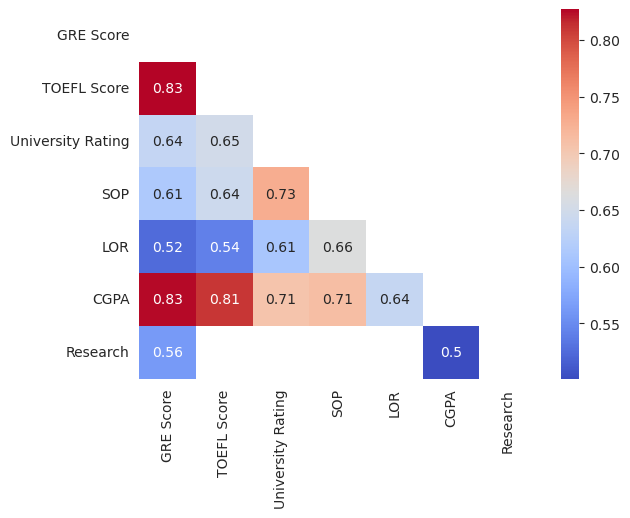

In [17]:
corr = df.drop('Chance of Admit', axis=1).corr()
# Set a threshold value
threshold = 0.5

# Create a mask for the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Filter the correlation matrix based on the threshold value
filtered_corr = corr.where(np.abs(corr) > threshold)

# Create a heatmap of the filtered correlation matrix
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', mask=mask, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

### 4.4 Inferences <a id='IF'></a>

**Inferences:**

* GRE Score, TOEFL Score, and CGPA are highly correlated with each other and are also highly correlated with the target variable Chance of Admit.
* University Rating has a moderate correlation with Chance of Admit, while SOP and LOR have a weak to moderate correlation with Chance of Admit.
* Research has a moderate correlation with CGPA but has a weak correlation with other features and Chance of Admit.
* There is a high correlation between GRE Score and TOEFL Score, indicating that they measure similar abilities.
* There is a high correlation between CGPA and GRE Score/TOEFL Score, indicating that students who perform well in one test are likely to perform well in the others as well.
* There is a moderate correlation between University Rating and SOP/LOR, indicating that students' perception of the university's quality is related to the quality of the statement of purpose and letter of recommendation.

## 5. Modeling <a id='Model'></a>

### 5.1 Train test Split <a id='TTS'></a>

In [18]:
# Split the data into independent and dependent variables

X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [19]:
# Split the data into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5.2 Feature Scaling<a id='Scaling'></a>

In [20]:
#keep the column names, to use after scaling
columns = X.columns

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Create dataframe with columns
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [21]:
X_train.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.39,0.60,-0.10,0.13,0.56,0.42,0.90
1,-0.07,0.60,0.78,0.63,1.65,-0.07,-1.12


### 5.3 Model training <a id='Model_training'></a>

#### 5.3.1 Baseline Model <a id='baseline'></a>

In [22]:
_model = LinearRegression()
_model.fit(X_train, y_train)
print("Train R2 Score:",_model.score(X_train, y_train).round(3))

Train R2 Score: 0.821


#### 5.3.2 Lasso <a id='lasso'></a>

Lasso regression is similar to ridge regression, but instead of adding the squared coefficients, it adds the absolute values of the coefficients, called L1 regularization, which tends to shrink some coefficients to exactly zero, making it a useful technique for feature selection.

In [23]:
#Lasso Regression 

train_scores = []
for lamb in [10**x for x in range(-5, 4)]:
    lasso = Lasso(alpha=lamb, random_state=1)
    lasso.fit(X_train, y_train)
    train_scores.append(lasso.score(X_train, y_train).round(3))
    
print('Lasso Regression Score:', max(train_scores))

Lasso Regression Score: 0.821


#### 5.3.3 Ridge <a id='ridge'></a>

Ridge regression is a linear regression technique that adds a penalty term to the squared coefficients, called L2 regularization, which helps to avoid overfitting by shrinking the coefficients towards zero.

In [24]:
#Ridge Regression
train_scores_1 = []

for lamb in [10**x for x in range(-3, 4)]:
    ridge = Ridge(alpha=lamb, random_state=1)
    ridge.fit(X_train, y_train)
    train_scores_1.append(ridge.score(X_train, y_train).round(3))
    
print('Ridge Regression Score:', max(train_scores_1))

Ridge Regression Score: 0.821


The baseline model performs similarly to Ridge And Lasso so  regularization may not be necessary.<br>

However, exploring the effect of regularization on the model performance is still a good idea, as it may help to improve the model's interpretability and generalization ability. So we'll perform them.

### 5.4 Check VIF Score <a id='VIF'></a>

We'll check for multi-collinearity

In [25]:
# Print VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.65
0,GRE Score,4.49
1,TOEFL Score,3.66
3,SOP,2.79
2,University Rating,2.57
4,LOR,1.98
6,Research,1.52


Although VIF score of CGPA-4.65 & GRE Score-4.49 are not very high, but they do indicate some level of multi-collinearity.

We'll drop one of them, and check any significant performance improvement.

In [26]:
# Drop CGPA from Train Set
X_train_1 = X_train.drop('CGPA', axis=1)

# Train model to check performance
model_1 = LinearRegression()
model_1.fit(X_train_1, y_train)
print("Train R2 Score after dropping CGPA:",model_1.score(X_train_1, y_train).round(3))

Train R2 Score after dropping CGPA: 0.771


In [27]:
# Drop CGPA from Train Set
X_train_2 = X_train.drop('GRE Score', axis=1)

# Train model to check performance
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train)
print("Train R2 Score after dropping GRE Score:",model_2.score(X_train_2, y_train).round(3))

Train R2 Score after dropping GRE Score: 0.813


Dropping any of them didn't improved the performance, so we'll keep both.

### 5.5 Model Summary <a id='model_summary'></a>

* The coef column shows the estimated coefficient or slope for each feature in the model, representing the change in the target variable for a one-unit change in the corresponding feature, holding all other features constant.
* The intercept coefficient represents the expected value of the target variable when all features are equal to 0.
* The p>|t| column shows the p-value associated with each coefficient, representing the probability of observing a coefficient as large as the estimated value, assuming that the null hypothesis (i.e., no relationship between the feature and target variable) is true.
* A small p-value (e.g., < 0.05) suggests that the coefficient is statistically significant and unlikely to have occurred by chance, indicating a strong evidence for a non-zero relationship between the feature and target variable.
* A large p-value (e.g., > 0.05) suggests that the coefficient is not statistically significant, indicating a weak or no evidence for a non-zero relationship between the feature and target variable.
* It's important to note that the significance and direction of the coefficients may change when adding or removing features from the model, and may depend on the assumptions of the linear regression model, such as linearity, normality, homoscedasticity, and independence of errors.

In [28]:

X_train_sm = sm.add_constant(X_train)  #Statmodels default is without intercept, to add intercept we need to add constant 

sm_model = sm.OLS(y_train.reset_index(drop=True), X_train_sm).fit()

print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          3.41e-142
Time:                        20:40:28   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

Since the P-values of 'SOP' and 'University Rating' are high, we'll remove one by one

In [29]:
X_train_sm.drop(columns=['SOP'], inplace=True)
model = sm.OLS(y_train.reset_index(drop=True), X_train_sm)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     300.4
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          2.01e-143
Time:                        20:40:29   Log-Likelihood:                 561.85
No. Observations:                 400   AIC:                            -1110.
Df Residuals:                     393   BIC:                            -1082.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7242      0.00

In [30]:
X_train_sm.drop(columns=['University Rating'], inplace=True)
model = sm.OLS(y_train.reset_index(drop=True), X_train_sm)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Sun, 02 Apr 2023   Prob (F-statistic):          1.36e-144
Time:                        20:40:29   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7242      0.003    241.830      

So our final model will have only 5 columns:
    GRE Score, TOEFL Score, LOR, CGPA, Research

### 5.6 Model Tuning <a id='Model_Tuning'></a>

* Regularization can help to prevent overfitting by shrinking the model coefficients towards zero, which can reduce the model complexity and improve its generalization ability to new data.
* Regularization can also help to improve the stability and robustness of the model by reducing the impact of individual observations or outliers.
* Therefore, even if the baseline model performs well, it is still worth exploring the effect of regularization on the model performance and comparing different regularization techniques to see if they can further improve the model's performance and interpretability.

In [31]:
cols = X_train_sm.columns[1:]
cols

Index(['GRE Score', 'TOEFL Score', 'LOR', 'CGPA', 'Research'], dtype='object')

In [32]:
X_train = X_train[cols]
X_test = X_test[cols]

In [33]:
lmodel = LinearRegression()
lmodel.fit(X_train, y_train)
print(f"Final R2 Score = {lmodel.score(X_train, y_train).round(3)}")

Final R2 Score = 0.821


* The below code is using three different linear regression models, namely Ridge, Lasso, and ElasticNet.
* A list of dictionaries is created, where each dictionary specifies the name of the model, the estimator object, and the hyperparameters to be tuned for that model.
* The solver is set to 'auto', which means that the solver will be automatically selected based on the type of data and regularization used.
* The hyperparameters for Lasso, Ridge, ElasticNet regression include the regularization strength alpha and l1 ratio in ElasticNet, which controls the balance between the l1 and l2 penalties.
* GridSearchCV is used to perform hyperparameter tuning on each model using a 5-fold cross-validation.
* The performance metric used to evaluate the models is negative mean squared error (scoring='neg_mean_squared_error'), which is a commonly used metric for regression problems.
* The negative value is used because GridSearchCV tries to maximize the score, but we want to minimize the mean squared error. Therefore, we take the negative value so that GridSearchCV can maximize it, and thus minimize the mean squared error.
* For each model, the best hyperparameters and the corresponding mean squared error (the negative of neg_mean_squared_error) are printed.
* n_jobs=-1 is used to utilize all available CPU cores to speed up the grid search process.

In [34]:
# Create a list of models to tune
models = [
    {
        'name': 'Ridge',
        'estimator': Ridge(),
        'hyperparameters': {
            'alpha': [0.01, 0.1, 1, 10, 100],
            'solver': ['auto']
            #'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
        }
    },
    {
        'name': 'Lasso',
        'estimator': Lasso(),
        'hyperparameters': {
            'alpha': [0.0001, 0.001, 0.01, 0.1, 1]
            #'selection': ['cyclic', 'random']
        }
    },
    {
        'name': 'ElasticNet',
        'estimator': ElasticNet(),
        'hyperparameters': {
            'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            'l1_ratio': np.arange(0.0, 1.0, 0.1)
            #'selection': ['cyclic', 'random']
        }
    }
]

# Tune each model using GridSearchCV
for model in models:
    print(f"Grid search for {model['name']}...")
    grid = GridSearchCV(
        model['estimator'], 
        param_grid=model['hyperparameters'], 
        scoring='neg_mean_squared_error', 
        cv=5,
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    
    # Print the best hyperparameters and the corresponding mean squared error
    print(f"Best parameters: {grid.best_params_}")
    print(f"Best mean squared error: {-grid.best_score_:.4f}")
    print("=" * 50)

Grid search for Ridge...
Best parameters: {'alpha': 10, 'solver': 'auto'}
Best mean squared error: 0.0036
Grid search for Lasso...
Best parameters: {'alpha': 0.0001}
Best mean squared error: 0.0036
Grid search for ElasticNet...
Best parameters: {'alpha': 0.01, 'l1_ratio': 0.0}
Best mean squared error: 0.0036


The **warning message suggests** that:
* the coordinate descent algorithm did not converge to a solution that satisfies the specified tolerance level, indicating that the solution may not be accurate.
* increasing the number of iterations or checking the scale of the features may improve convergence.
* if the goal is to fit a linear regression model with null weight for the L1 regularization term, it may be more efficient to use one of the solvers implemented in scikit-learn's Ridge or RidgeCV instead.

So, we are good to continue with baseline model as our final model.

In [35]:
# Create the Ridge model using the best hyperparameters
ridge = Ridge(alpha=10, solver='auto')

# Create the Lasso model using the best hyperparameters
lasso = Lasso(alpha=0.0001)

# Create the ElasticNet model using the best hyperparameters
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.0)

# Fit the models on the entire training dataset
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elasticnet.fit(X_train, y_train)

ElasticNet(alpha=0.01, l1_ratio=0.0)

In [36]:
# Make predictions using the trained models
ridge_preds = ridge.predict(X_test)
lasso_preds = lasso.predict(X_test)
elasticnet_preds = elasticnet.predict(X_test)
final_preds = lmodel.predict(X_test)

In [37]:
# Calculate the mean squared error for the predictions
ridge_mse = mean_squared_error(y_test, ridge_preds)
lasso_mse = mean_squared_error(y_test, lasso_preds)
elasticnet_mse = mean_squared_error(y_test, elasticnet_preds)
final_mse = mean_squared_error(y_test, final_preds)

# Print the mean squared error for each model
print("Ridge mean squared error: {:.4f}".format(ridge_mse))
print("Lasso mean squared error: {:.4f}".format(lasso_mse))
print("ElasticNet mean squared error: {:.4f}".format(elasticnet_mse))
print("Baseline mean squared error: {:.4f}".format(final_mse))

Ridge mean squared error: 0.0038
Lasso mean squared error: 0.0038
ElasticNet mean squared error: 0.0038
Baseline mean squared error: 0.0038


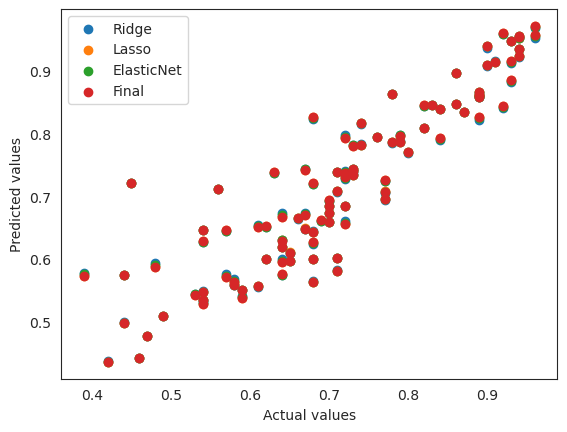

In [38]:
import matplotlib.pyplot as plt

# Plot the actual versus predicted values for each model
plt.scatter(y_test, ridge_preds, label='Ridge')
plt.scatter(y_test, lasso_preds, label='Lasso')
plt.scatter(y_test, elasticnet_preds, label='ElasticNet')
plt.scatter(y_test, final_preds, label='Final')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()
plt.show()

In [39]:
print(f"Final Test R2 Score = {lmodel.score(X_test, y_test).round(3)}")
print(f"Ridge Test R2 Score = {ridge.score(X_test, y_test).round(3)}")
print(f"Lasso Test R2 Score = {lasso.score(X_test, y_test).round(3)}")
print(f"ElasticNet Test R2 Score = {elasticnet.score(X_test, y_test).round(3)}")

Final Test R2 Score = 0.816
Ridge Test R2 Score = 0.814
Lasso Test R2 Score = 0.816
ElasticNet Test R2 Score = 0.815


### 5.7 Feature Importance <a id='Feature_Importance'></a>

       Feature  Importance
3         CGPA        0.07
0    GRE Score        0.03
1  TOEFL Score        0.02
2          LOR        0.02
4     Research        0.01


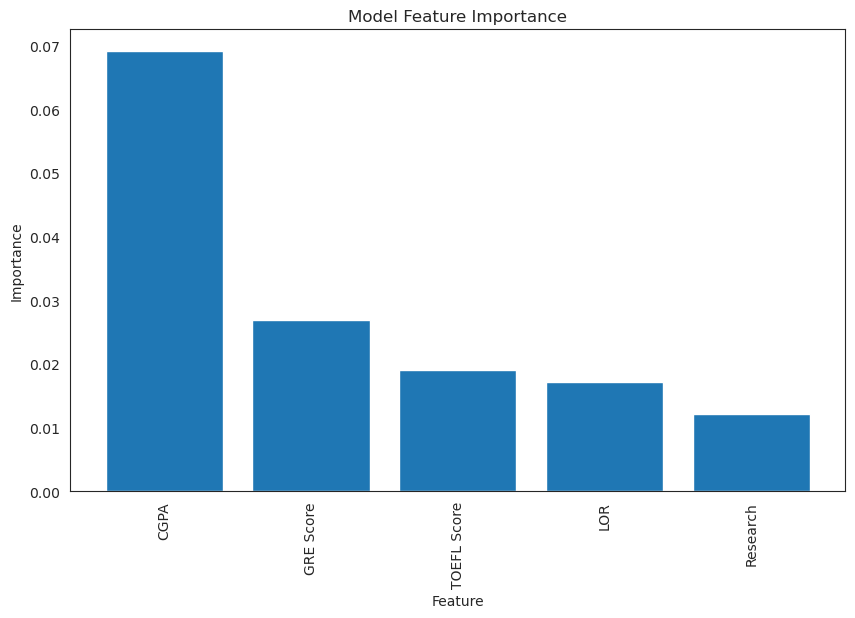

In [40]:
# Get the absolute value of the coefficients from the model
lmodel_coefs = np.abs(lmodel.coef_)

# Get the names of the features from the column names of the X_train DataFrame
feature_names = X_train.columns

# Create a DataFrame to store the feature names and their importance scores
model_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lmodel_coefs
})

# Sort the features by importance score in descending order
model_feature_importance = model_feature_importance.sort_values(by='Importance', ascending=False)

print(model_feature_importance)

# Plot the feature importance scores as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(x=model_feature_importance['Feature'], height=model_feature_importance['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Model Feature Importance')
plt.show()

* These feature importance values represent the relative importance of each feature in predicting the target variable.
* In this example, the CGPA feature has the highest importance score of 0.07, followed by GRE Score with 0.03, TOEFL Score and LOR with 0.02 each, and Research with 0.01.
* The higher the importance score, the more influential the feature is in predicting the target variable, all other things being equal.
* Feature importance scores can be useful for identifying the most relevant features in the model, and for feature selection or feature engineering purposes.
* However, it is important to note that feature importance scores are based on the specific model and dataset used, and may not generalize well to other models or datasets. Therefore, it is recommended to interpret feature importance values in the context of the specific modeling task and dataset.

## **6. Assumptions Validation** <a id='Assumptions'></a>

## 6.1. Linearity <a id='Linearity'></a>

High R2 score (0.829) means that the dependent variable has linear relationship with indepenedent variables.

### 6.2. Features are not multi-collinear <a id='Multicollinear'></a>

In [41]:
#Calculate VIF of each features

vif = pd.DataFrame()
X_t = X_train
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,4.47
3,CGPA,4.28
1,TOEFL Score,3.54
2,LOR,1.66
4,Research,1.50


    Since VIF score of each feature is less than 10, it means there's no significant multicollinearity.

### 6.3. Errors are normally distributed <a id='error_dist'></a>

In [42]:
y_pred = lmodel.predict(X_train)
errors = y_train - y_pred

Text(0.5, 1.0, 'Histogram of residuals')

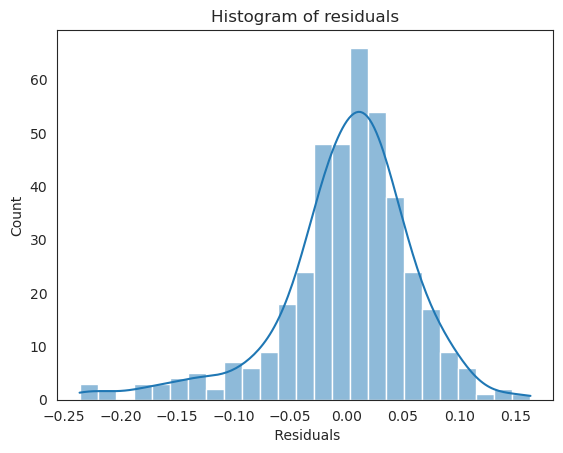

In [43]:
sns.histplot(errors, kde=True)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

In [44]:
from scipy.stats import shapiro
print('P-value for Shapiro wilk test of normality:', shapiro(errors)[1])

P-value for Shapiro wilk test of normality: 1.310131365374334e-12


Shapiro wilk test fails, errors not normally distributed.

### 6.4. Heteroskedasticity should not exist  <a id='Heteroskedasticity'></a>

Text(0.5, 1.0, 'Predicted values vs Residuals')

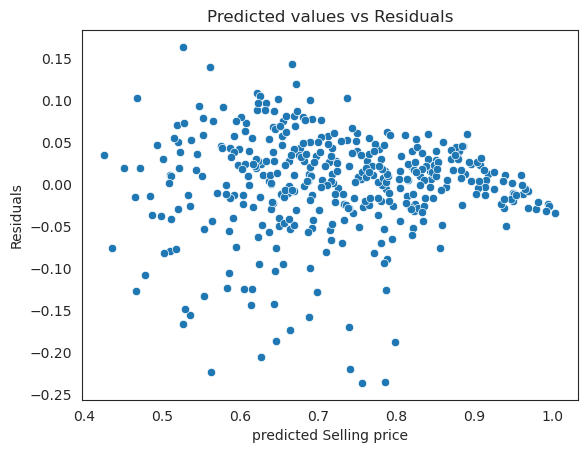

In [45]:
sns.scatterplot(x=y_pred,y = errors)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

**To check statistically, performing White test**

Null (H0): Homoscedasticity is present (residuals are equally scattered)<br>
Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered)

In [46]:
# Get the residuals and design matrix from the model
resid = y_train - lmodel.predict(X_train)
exog = sm.add_constant(X_train)

# Test for heteroscedasticity using the White test
white_test = het_white(resid, exog)

# Print the test results
print('Lagrange multiplier statistic: ', white_test[0])
print('p-value: ', white_test[1])
print('f-value: ', white_test[2])

Lagrange multiplier statistic:  37.98642848463443
p-value:  0.005958346982827226
f-value:  2.0986190283212687


Since the p-value is not less than 0.05, we fail to reject the null hypothesis.<br>
Heteroscedasticity does not exist.

### 6.5. Mean of Residuals <a id='Residuals'></a>

In [47]:
print('Mean of residuals: ', np.mean(errors))

Mean of residuals:  1.4543921622589551e-16


	The mean of residuals is almost zero, so this assumption is satisfied

**All assumptions of linear regression do not need to be perfectly met, but violating certain assumptions may affect the validity and interpretation of the model results.**

## **7. Model Performance Evaluation** <a id='Model_performance'></a>

In [48]:
y_pred_final = lmodel.predict(X_test)
residuals = y_test - y_pred_final

In [49]:
def adjR2score(y_test, y_pred, n, d):
    r2 = r2_score(y_test, y_pred)
    return (1 - (1-r2)*(n-1)/(n-d-1)).round(3)

In [50]:
print("MAE of the model:", mean_absolute_error(y_test, y_pred_final).round(3))
print("RMSE of the model:", np.sqrt(mean_squared_error(y_test, y_pred_final)).round(3))
print("R2 Score of the model:", r2_score(y_test, y_pred_final).round(3))
print("Adj R2 Score of the model:", adjR2score(y_test, y_pred_final, X_test.shape[0], X_test.shape[1]))

MAE of the model: 0.043
RMSE of the model: 0.061
R2 Score of the model: 0.816
Adj R2 Score of the model: 0.806


* **Mean Absolute Error (MAE):** The average difference between the predicted and actual values is 0.043, which suggests that the model's predictions are off by an average of 0.043 units.<br>
* **Root Mean Squared Error (RMSE):** The square root of the average squared difference between the predicted and actual values is 0.061, which suggests that the model's predictions are generally accurate, with an average error of 0.061 units.<br>
* **R2 Score:** This metric indicates how well the model fits the data, with a score of 0.816 indicating that the model explains 81.6% of the variance in the target variable.<br>
* **Adjusted R2 Score:** This metric takes into account the number of features in the model and adjusts the R2 score accordingly. A score of 0.806 suggests that the model explains a slightly lower proportion of the variance in the target variable after adjusting for the number of features.

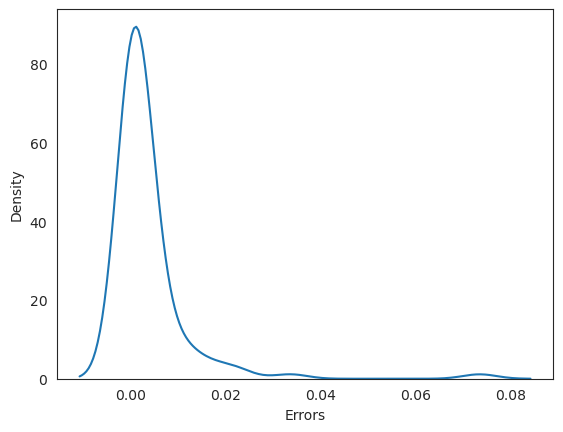

In [51]:
# Errors
errors = (y_test - y_pred_final)**2

sns.kdeplot(errors)
plt.xlabel("Errors")
plt.show()

In [52]:
# # Let's check the cumulative errors

# sns.kdeplot(errors, cumulative=True)
# plt.xticks(np.arange(np.round(errors.min(),2), np.round(errors.max(),2) + 0.01, 0.01))
# plt.yticks(np.arange(0, 1.1, 0.1))
# plt.xlabel('Errors')
# plt.grid()
# plt.show()

## **8. Insights:**  <a id='Insights'></a>
 
* The Serial No. feature is dropped as it is not useful for analysis.
* There are no missing or duplicate records in the dataset.
* All features are numerical.
* No outliers were detected as the mean-median difference was insignificant.
* The GRE score ranges from 290-340, TOEFL score from 92-120, and CGPA from 6.9-9.9.
* GRE Score, TOEFL Score, and CGPA are highly correlated with each other and are also highly correlated with the target variable Chance of Admit.
* University Rating has a moderate correlation with Chance of Admit, while SOP and LOR have a weak to moderate correlation with Chance of Admit.
* Research has a moderate correlation with CGPA but has a weak correlation with other features and Chance of Admit.
* There is a high correlation between GRE Score and TOEFL Score, indicating that they measure similar abilities.
* There is a high correlation between CGPA and GRE Score/TOEFL Score, indicating that students who perform well in one test are likely to perform well in the others as well.
* There is a moderate correlation between University Rating and SOP/LOR, indicating that students' perception of the university's quality is related to the quality of the statement of purpose and letter of recommendation.
* Having research experience gives an advantage in the chances of admission.
* Higher scores in LOR or SOP improve the chances of admission.
* Around 56% of students in the dataset have research experience.
* None of the features used in the final modeling have a VIF greater than 5.
* Regularization is not required on the given dataset
* 'SOP' and 'University Rating' are not the important factors for predicting Admit rate.
* The CGPA feature has the highest importance score of 0.07, followed by GRE Score with 0.03, TOEFL Score and LOR with 0.02 each, and Research with 0.01.

## **9. Recommendations:**  <a id='Recommendations'></a>

* Features with higher chances of Admit are: 'CGPA'> 'GRE Score' > 'TOEFL Score' > 'LOR' >'Research',
    so student should make the profile accordingly to increase the chances of admit.

* Having research profile might provide some edge over other applicants.

* SOP is not that important in improving the chances of admit, so should be least prioritized.

* 'SOP' and 'University Rating' are not the important factors for predicting Admit rate.



<table align="center" width=60%>
    <tr>
        <td>
            <div align="center">
                <font color="#7F0542 ">
                    <b><h1>Thanks for taking time to read this notebook!<br>  Happy modeling! 😊👍🏼</h1>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>